In [1]:

import numpy as np
####################################
# 距離と類似度

#コサイン類似度
x = np.array([60,180])
y = np.array([60,150])

# コサイン類似度
D = np.dot(x,y); # 内積
xd = np.linalg.norm(x); #||x||
yd = np.linalg.norm(y); #||y||
C = D/(xd*yd); # コサイン類似度
print(C)

0.998274373174996


In [2]:
a=np.array([1,2,3,4,5])
b=np.array([2,2,3,3,4])

#ユークリッド距離
d2 = np.linalg.norm(a-b)
print(d2)

#マンハッタン距離
d1 = np.linalg.norm(a-b, ord=1)
print(d1)

#内積
ip = np.dot(a,b)
print(ip)

#コサイン類似度
s = np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))
print(s)

1.7320508075688772
3.0
47
0.9778941948273628


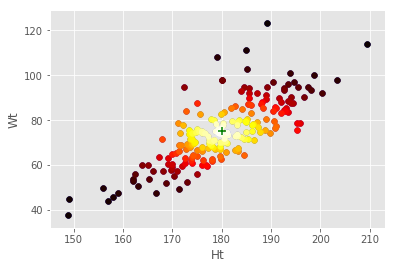

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# ちょっと高度な可視化
data_dir = './sample_data/'
f = pd.read_csv(data_dir+"height_weight.csv")
vlist = np.array(f)

# 分布の可視化
A = np.array([180,75])
f.plot(kind='scatter', x='Ht',y='Wt', c='blue',marker='o',s=30)
plt.scatter(A[0], A[1],c='red',marker='+',s=100)
# 距離の可視化
# compute distances
dlist = []
for row in vlist:
    d = np.linalg.norm(A-row[[2,3]])
    dlist.append(d)

# 距離が大きい順に並び替え
sinds = np.argsort(dlist)[::-1]

import matplotlib.cm as cm
count = 0
for i in sinds:
    row = vlist[i]
    c = cm.hot(count/len(vlist)) # 色のリストを作成
    plt.scatter(row[2],row[3],color=c)
    count += 1
plt.scatter(A[0], A[1],c='green',marker='+',s=60)


7.139153669483235
10.517595684606462
22.970666215811015
6.446247447536406


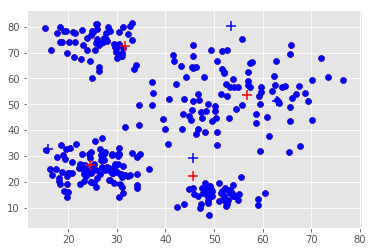

6.102943792757199
1.5076296226316466
4.003048688959919
1.993780429217176


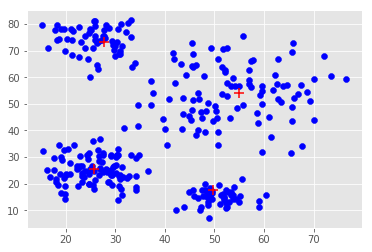

2.2046546806955196
0.41859764298908375
0.8875150723160056
0.6915319773720705


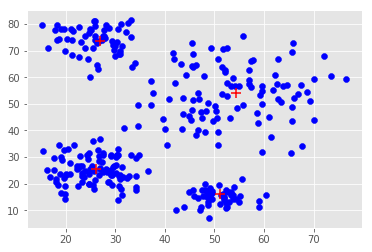

0.0
0.0
0.28477762877379115
0.1940208081717724


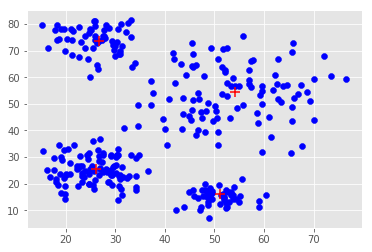

0.0
0.0
0.0
0.0


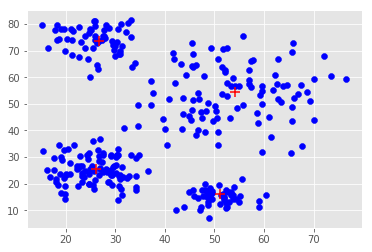

In [4]:
#############################################
# clustering : k-means
import matplotlib.pyplot as plt

# data 読み込み
import pandas as pd
f = pd.read_csv(data_dir+'data.csv', header=None)
vlist = np.array(f)
# kの決定
K = 4

## step 1
def nearest(X,CList):
    minD = float("inf") #最小値を無限大で初期化
    minId = 0
    #クラスタごとに代表点とXの距離を計算
    for ii in range(0,len(CList)):
        C = CList[ii]
        d = np.linalg.norm(X-C)
        #最小値よりdが小さい場合は最小値とクラスタidを更新
        if d < minD:
            minD = d
            minId = ii
    return minId

def selectCluster(vlist,CList):
    cIList = []
    #各点と最も近いクラスタを計算してリストに加えていく
    for row in vlist:
        cIList.append(nearest(row,CList))
    return cIList

def updataCenter(vlist,CIList,K):
    CList = []
    for k in range(K):
        Z = []
        for j in range(len(CIList)):
            if CIList[j] == k:
                Z.append(vlist[j])
        mc = np.mean(Z,0)
        CList.append(mc)
    return CList

# clustering
# 初期化
# random値の範囲決定
a = np.min(vlist[:,0])
b = np.max(vlist[:,0])
c = np.min(vlist[:,1])
d = np.max(vlist[:,1])
#初期点（K個）をランダムに決定
CList = np.c_[(b-a)*np.random.rand(K) + a, (d-c)*np.random.rand(K) + c]
plt.scatter(vlist[:,0], vlist[:,1])
plt.scatter(CList[:,0], CList[:,1],c='blue',marker='+',s=100)
orgCList = CList


Err = 0.1
maxittr = 100 #ループ回数
itt = 0
while itt < maxittr:
    end_flag = True
    preCList = CList #距離計算用に前回のリストを保存
    # 指示クラスタの決定
    CIList = selectCluster(vlist,CList)
    # クラスタ中心の更新
    CList = updataCenter(vlist,CIList,K)
    # 更新の際の移動距離の算出
    for j in range(len(CList)):
        cc = CList[j]
        pre = preCList[j]
        dd = np.linalg.norm(cc-pre)
        print(dd)
        if dd > Err:
            end_flag = False
    itt += 1
    # 可視化
    plt.scatter(vlist[:,0], vlist[:,1], c='blue')
    for k in range(len(CList)):
        mc = CList[k]
        plt.scatter(mc[0], mc[1],c='red',marker='+',s=100)
    plt.show()
    plt.pause(1)
    if end_flag == True:
        break


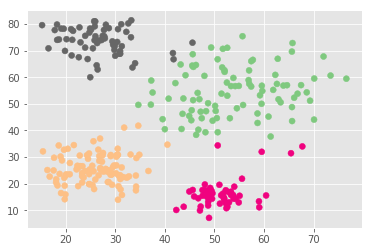

In [5]:
# ライブラリを使ったクラスタリング
from sklearn.cluster import KMeans
km_model = KMeans(n_clusters=4) #K=4のkmeansモデルの初期化
km_model.fit(vlist) #実際にデータをクラスタリング

km_model.cluster_centers_ # クラスタの中心たち

labels=km_model.labels_ # 各データがどのクラスタかが入っている

plt.scatter(vlist[:,0], vlist[:,1], c=labels,cmap=cm.Accent)
